In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np

In [2]:
# Load data from the JSON file
json_file_path = "ping/results_Shubham.json"  # Update with your actual file path
graph_path = "Airtel_graph/" # Update with your actual graph folder
operator = "Airtel" # Update with your actual operator name
with open(json_file_path, "r") as json_file:
    data = json.load(json_file)

In [3]:
# Create a DataFrame from the loaded data
df = pd.DataFrame(data)
df

,website,date,name,operator,ipv4,country_v4,city_v4,rtt_v4,hop_v4,ipv6,country_v6,city_v6,rtt_v6,hop_v6
0,www.aiims.edu,17 November 23,Shubham,Airtel,203.115.96.82,India,New Delhi,26,"{'1': ['33', '3', '3', '192.168.151.162'], '2'...",64:ff9b::cb73:6052,,,78,"{'1': ['4', '3', '4', '2401:4900:81e3:995::69'..."
1,www.aiims.edu,17 November 23,Shubham,Airtel,203.115.96.82,India,New Delhi,48,"{'1': ['33', '3', '3', '192.168.151.162'], '2'...",64:ff9b::cb73:6052,,,65,"{'1': ['4', '3', '4', '2401:4900:81e3:995::69'..."
2,www.aiims.edu,17 November 23,Shubham,Airtel,203.115.96.82,India,New Delhi,47,"{'1': ['33', '3', '3', '192.168.151.162'], '2'...",64:ff9b::cb73:6052,,,130,"{'1': ['4', '3', '4', '2401:4900:81e3:995::69'..."
3,www.aiims.edu,17 November 23,Shubham,Airtel,203.115.96.82,India,New Delhi,41,"{'1': ['33', '3', '3', '192.168.151.162'], '2'...",64:ff9b::cb73:6052,,,44,"{'1': ['4', '3', '4', '2401:4900:81e3:995::69'..."
4,www.aiims.edu,17 November 23,Shubham,Airtel,203.115.96.82,India,New Delhi,51,"{'1': ['33', '3', '3', '192.168.151.162'], '2'...",64:ff9b::cb73:6052,,,97,"{'1': ['4', '3', '4', '2401:4900:81e3:995::69'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29750,padlet.com,12 November 23,Shubham,Airtel,104.18.42.238,Canada,Toronto,51,"{'1': ['3', '3', '2', '192.168.29.75'], '2': [...",2606:4700:9641:6a28:9764:47f:307c:64ce,France,Paris,55,"{'1': ['3', '3', '3', '2401:4900:820e:1041::2d..."
29751,padlet.com,12 November 23,Shubham,Airtel,104.18.42.238,Canada,Toronto,33,"{'1': ['3', '3', '2', '192.168.29.75'], '2': [...",2606:4700:9641:6a28:9764:47f:307c:64ce,France,Paris,53,"{'1': ['3', '3', '3', '2401:4900:820e:1041::2d..."
29752,padlet.com,12 November 23,Shubham,Airtel,104.18.42.238,Canada,Toronto,36,"{'1': ['3', '3', '2', '192.168.29.75'], '2': [...",2606:4700:9641:6a28:9764:47f:307c:64ce,France,Paris,61,"{'1': ['3', '3', '3', '2401:4900:820e:1041::2d..."
29753,padlet.com,12 November 23,Shubham,Airtel,104.18.42.238,Canada,Toronto,32,"{'1': ['3', '3', '2', '192.168.29.75'], '2': [...",2606:4700:9641:6a28:9764:47f:307c:64ce,France,Paris,51,"{'1': ['3', '3', '3', '2401:4900:820e:1041::2d..."


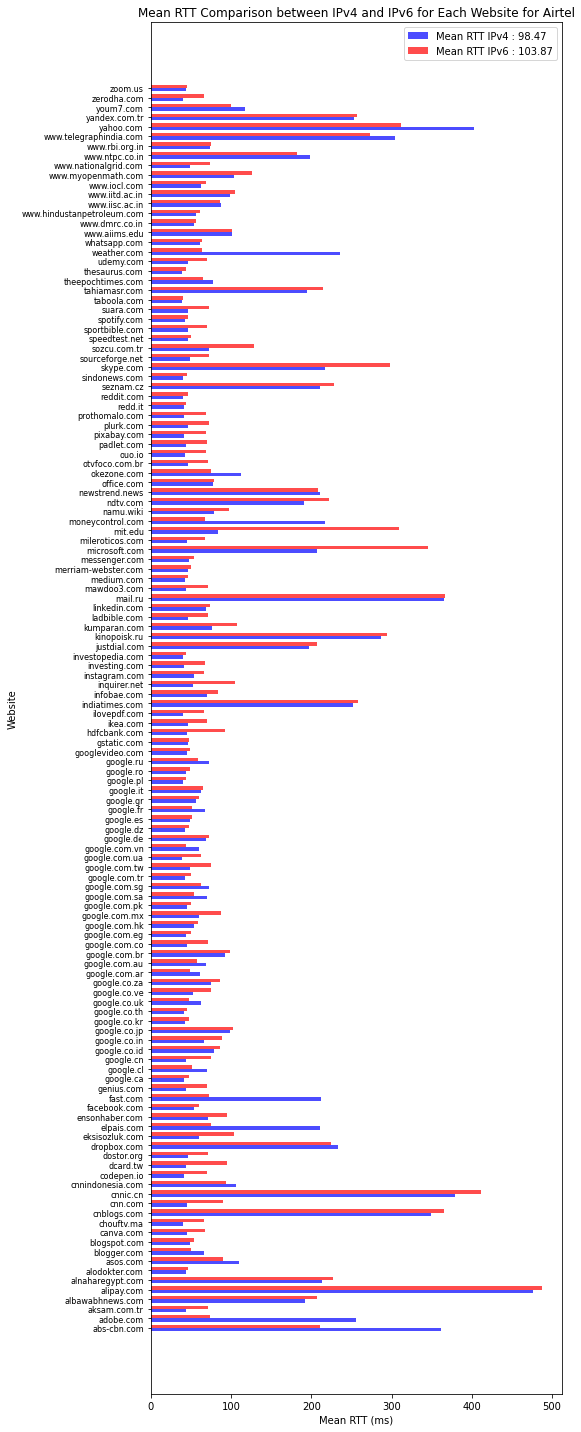

In [5]:
# Group data by the "website" column
grouped_data = df.groupby('website')

# Lists to store mean RTT values for each website
mean_rtt_v4_values_by_website = []
mean_rtt_v6_values_by_website = []
websites = []

# Lists to store overall mean RTT values for IPv4 and IPv6
overall_mean_rtt_v4_values = []
overall_mean_rtt_v6_values = []

# Perform analysis for each group
for website, group in grouped_data:
    # Calculate mean RTT values for 'rtt_v4' and 'rtt_v6'
    mean_rtt_v4 = group['rtt_v4'].astype(float).mean()
    mean_rtt_v6 = group['rtt_v6'].astype(float).mean()

    # Append mean RTT values to the lists
    mean_rtt_v4_values_by_website.append(mean_rtt_v4)
    mean_rtt_v6_values_by_website.append(mean_rtt_v6)
    websites.append(website)

    # Group by date for further analysis
    grouped_by_date = group.groupby('date')
    
    # Lists to store mean RTT values for each date
    mean_rtt_v4_values_by_date = []
    mean_rtt_v6_values_by_date = []

    for date, date_group in grouped_by_date:
        # Calculate mean RTT values for each date
        mean_rtt_v4_date = date_group['rtt_v4'].astype(float).mean()
        mean_rtt_v6_date = date_group['rtt_v6'].astype(float).mean()

        # Append mean RTT values to the lists
        mean_rtt_v4_values_by_date.append(mean_rtt_v4_date)
        mean_rtt_v6_values_by_date.append(mean_rtt_v6_date)

    # Calculate overall mean values for IPv4 and IPv6
    overall_mean_rtt_v4 = sum(mean_rtt_v4_values_by_date) / len(mean_rtt_v4_values_by_date)
    overall_mean_rtt_v6 = sum(mean_rtt_v6_values_by_date) / len(mean_rtt_v6_values_by_date)
    
    # Plotting mean RTT values for each date
    plt.figure(figsize=(10, 6))
    plt.plot(grouped_by_date.groups.keys(), mean_rtt_v4_values_by_date, label=f'Mean RTT IPv4 : {overall_mean_rtt_v4:.2f}', marker='o', color = 'blue')
    plt.plot(grouped_by_date.groups.keys(), mean_rtt_v6_values_by_date, label=f'Mean RTT IPv6 : {overall_mean_rtt_v6:.2f}', marker='o', color = 'red')
    plt.title(f'Mean RTT Comparison for {website} for {operator}')
    plt.xlabel('Date')
    plt.ylabel('Mean RTT (ms)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()  # Ensures proper spacing
    plt.savefig(f'{graph_path}for_{website}_by_date.png', dpi=300)  # Adjust file name and dpi as needed
    plt.close()

# Calculate overall mean values for IPv4 and IPv6
overall_mean_rtt_v4_website = sum(mean_rtt_v4_values_by_website) / len(mean_rtt_v4_values_by_website)
overall_mean_rtt_v6_website = sum(mean_rtt_v6_values_by_website) / len(mean_rtt_v6_values_by_website)

# Plotting mean RTT values for each website as a non-overlapping bar graph
plt.figure(figsize=(8, 20))

bar_width = 0.35  # Adjust the bar width as needed
index = range(len(websites))

plt.barh(index, mean_rtt_v4_values_by_website, bar_width, label=f'Mean RTT IPv4 : {overall_mean_rtt_v4_website:.2f}', alpha=0.7, color='blue')
plt.barh([i + bar_width for i in index], mean_rtt_v6_values_by_website, bar_width, label=f'Mean RTT IPv6 : {overall_mean_rtt_v6_website:.2f}', alpha=0.7, color='red')

plt.title(f'Mean RTT Comparison between IPv4 and IPv6 for Each Website for {operator}')
plt.ylabel('Website')
plt.xlabel('Mean RTT (ms)')
plt.legend()
plt.yticks([i + bar_width / 2 for i in index], websites, fontsize=8)
plt.tight_layout()  # Ensures proper spacing
plt.savefig(f'{graph_path}group_by_website.png', dpi=600)  # Adjust file name and dpi as needed
plt.show()
plt.close()

Skipping instagram.com due to mismatched data lengths.


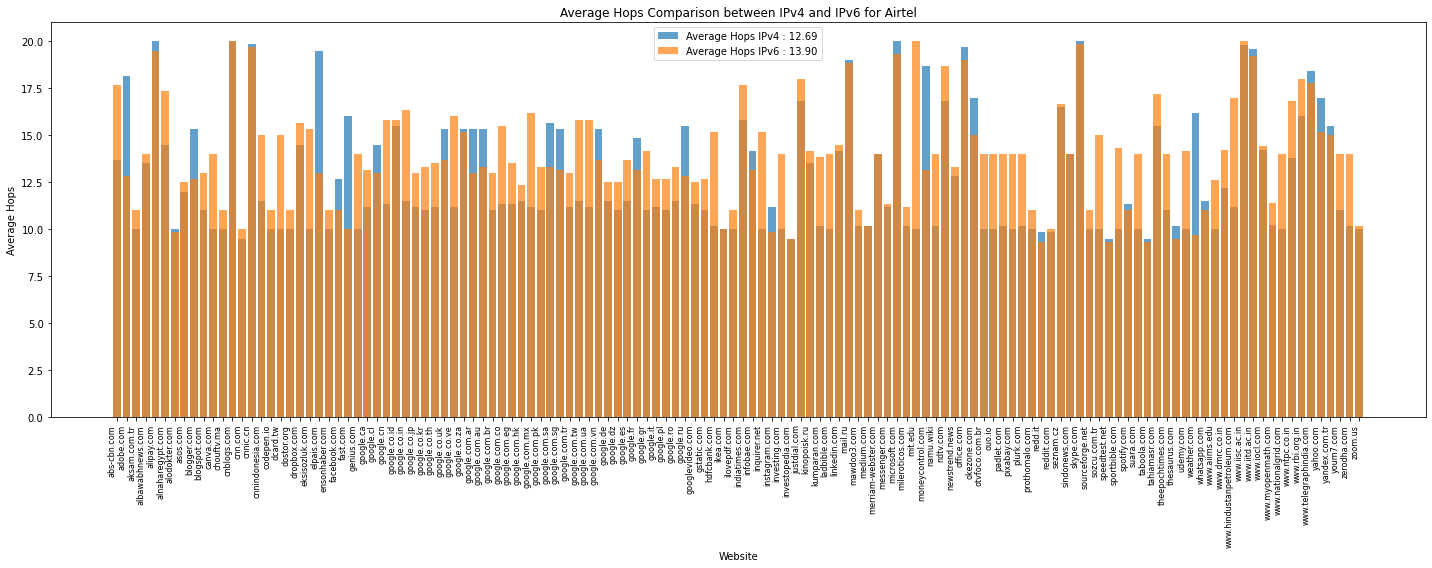

In [10]:
# Group data by the "website" column
grouped_data = df.groupby('website')

# Dictionary to store hop keys and dates for each website
hop_data_by_website = {}

# Extract the max hop key for each date for hop_v4 and hop_v6 for each website
for website, group in grouped_data:
    hop_v4_max_keys = []
    hop_v6_max_keys = []
    dates = sorted(set(group['date'].unique()))

    # Extract max hop key for hop_v4 and hop_v6 for each date
    for date in dates:
        hop_v4_keys = group[group['date'] == date]['hop_v4'].iloc[0].keys()
        if hop_v4_keys:
            hop_v4_max_keys.append(max(map(int, hop_v4_keys)))

        hop_v6_keys = group[group['date'] == date]['hop_v6'].iloc[0].keys()
        if hop_v6_keys:
            hop_v6_max_keys.append(max(map(int, hop_v6_keys)))

    # Store the data in the dictionary
    hop_data_by_website[website] = {
        'hop_v4_max_keys': hop_v4_max_keys,
        'hop_v6_max_keys': hop_v6_max_keys,
        'dates': dates
    }

# Lists to store mean hop values for each website
avg_hops_v4_values_by_website = []
avg_hops_v6_values_by_website = []
websites = []

# Lists to store hop values for each date for a specific website
hop_v4_values_by_date = {}
hop_v6_values_by_date = {}


for website, data in hop_data_by_website.items():
    avg_hops_v4 = sum(data['hop_v4_max_keys']) / len(data['hop_v4_max_keys'])
    avg_hops_v6 = sum(data['hop_v6_max_keys']) / len(data['hop_v6_max_keys'])

    avg_hops_v4_values_by_website.append(avg_hops_v4)
    avg_hops_v6_values_by_website.append(avg_hops_v6)
    websites.append(website)

# Plot 2: Hops v4 vs v6 per date for a website
for website, data in hop_data_by_website.items():
    if len(data['dates']) != len(data['hop_v4_max_keys']) or len(data['dates']) != len(data['hop_v6_max_keys']):
        print(f"Skipping {website} due to mismatched data lengths.")
        continue

    plt.plot(data['dates'], data['hop_v4_max_keys'], label=f'{website} - IPv4', marker='o', color='blue')
    plt.plot(data['dates'], data['hop_v6_max_keys'], label=f'{website} - IPv6', marker='o', color='red')

    plt.title('Hops Comparison between IPv4 and IPv6')
    plt.xlabel('Date')
    plt.ylabel('Hops')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'{graph_path}for_{website}_by_hops.png', dpi=300)  # Adjust file name and dpi as needed
    plt.close()

overall_mean_hop_v4 = sum(avg_hops_v4_values_by_website) / len(avg_hops_v4_values_by_website)
overall_mean_hop_v6 = sum(avg_hops_v6_values_by_website) / len(avg_hops_v6_values_by_website)
# Plot 3: Average hops v4 vs v6 for each website
plt.figure(figsize=(20, 8))
plt.bar(websites, avg_hops_v4_values_by_website, label=f'Average Hops IPv4 : {overall_mean_hop_v4:.2f}', alpha=0.7)
plt.bar(websites, avg_hops_v6_values_by_website, label=f'Average Hops IPv6 : {overall_mean_hop_v6:.2f}', alpha=0.7)
plt.title(f'Average Hops Comparison between IPv4 and IPv6 for {operator}')
plt.xlabel('Website')
plt.ylabel('Average Hops')
plt.legend()
plt.xticks(rotation=90, ha='right', fontsize=8)  # Adjust the rotation angle and font size as needed
plt.tight_layout()
plt.savefig(f'{graph_path}group_by_hops.png', dpi=600)  # Adjust file name and dpi as needed
plt.show()
plt.close()

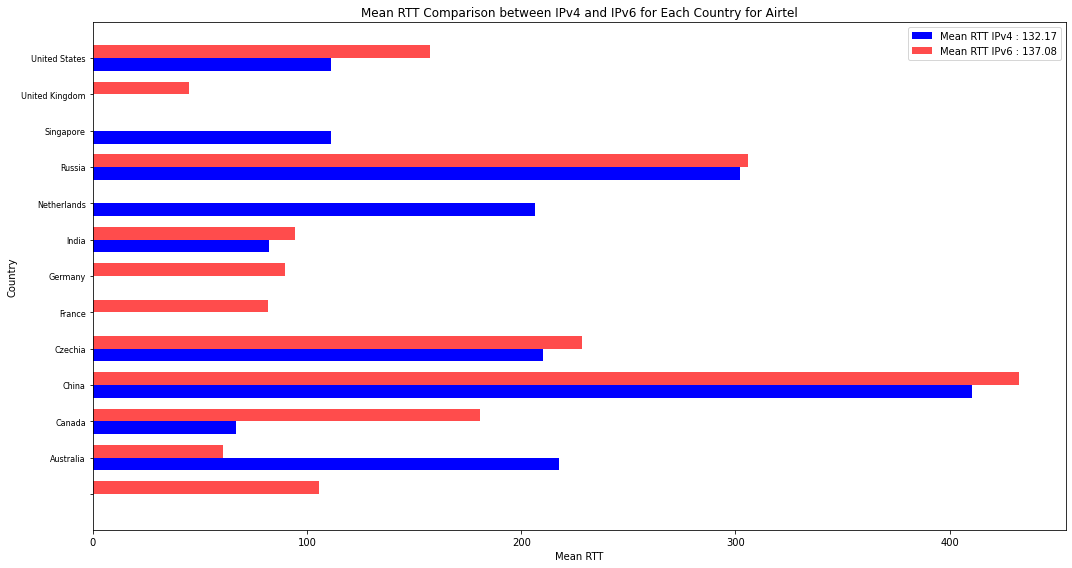

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your original DataFrame

# Group data by the "country_v4" column
grouped_data_v4 = df.groupby('country_v4')

# Group data by the "country_v6" column
grouped_data_v6 = df.groupby('country_v6')

# Dictionaries to store mean RTT values for each country
mean_rtt_v4_by_country = {}
mean_rtt_v6_by_country = {}

# Calculate mean RTT values for IPv4
for country, country_group in grouped_data_v4:
    mean_rtt_v4_by_country[country] = country_group['rtt_v4'].astype(float).mean()

# Calculate mean RTT values for IPv6
for country, country_group in grouped_data_v6:
    mean_rtt_v6_by_country[country] = country_group['rtt_v6'].astype(float).mean()

# Get all unique countries from both IPv4 and IPv6
all_countries = sorted(set(mean_rtt_v4_by_country.keys()) | set(mean_rtt_v6_by_country.keys()))

# Lists to store mean RTT values for each country
mean_rtt_v4_values = [mean_rtt_v4_by_country.get(country, 0) for country in all_countries]
mean_rtt_v6_values = [mean_rtt_v6_by_country.get(country, 0) for country in all_countries]
countries = list(all_countries)
overall_mean_rtt_v4_country = sum(mean_rtt_v4_values) / len(mean_rtt_v4_values)
overall_mean_rtt_v6_country = sum(mean_rtt_v6_values) / len(mean_rtt_v6_values)

# Set the height of the bars
bar_height = 0.35

# Set the positions of bars on Y-axis
r1 = np.arange(len(countries))
r2 = [y + bar_height for y in r1]

# Plotting mean RTT values for each country as side-by-side horizontal bar graphs
plt.figure(figsize=(15, 8))
plt.barh(r1, mean_rtt_v4_values, height=bar_height, label=f'Mean RTT IPv4 : {overall_mean_rtt_v4_country:.2f}', color = 'blue')
plt.barh(r2, mean_rtt_v6_values, height=bar_height, label=f'Mean RTT IPv6 : {overall_mean_rtt_v6_country:.2f}', alpha=0.7, color = 'red')
plt.title(f'Mean RTT Comparison between IPv4 and IPv6 for Each Country for {operator}')
plt.ylabel('Country')
plt.xlabel('Mean RTT')
plt.legend()
plt.yticks([r + bar_height/2 for r in range(len(countries))], countries, rotation=0, ha='right', fontsize=8)
plt.tight_layout()  # Ensures proper spacing
plt.savefig(f'{graph_path}countries_comparison.png', dpi=300)  # Adjust file name and dpi as needed
plt.show()
plt.close()
